# Problema:

### Usando operaciones aritméticas básicas: +, -, *, /    calcular sen(x) para $x \in[-\pi,\pi]$

Sabemos que $$\sin^2(x)+\cos^2(x)=1$$ $$\sin(2x)=2\sin(x)\cos(x)$$

Tenemos también que $\sin(x)\approx x$ si $x\approx 0$. Entonces, si $x\approx 0$, el problema está resuelto, ya que podemos usar esta aproximación:

$$\sin(x)\approx x$$

Ahora, si $x\nsim 0$ y $x\in[-\pi,\pi]\Rightarrow |x|<4$

Veamos también que:

$$\dfrac{x}{2^{10}}<\dfrac{4}{2^{10}}=\dfrac{1}{2^8}\leq 0.0039 \approx 0$$

Por lo tanto,

$$\sin^2\left(\dfrac{x}{2^{10}}\right) \approx \left(\dfrac{x}{2^{10}}\right)^2$$

Sea pues $$y = \left(\dfrac{x}{2^{10}}\right)^2$$ y $x_0 = x/2^{10}$. Entonces, $$\sin^2(x_0)\approx y$$

Además, $$\sin^2(2x)=4\sin^2(x)\cos^2(x)=4\sin^2(x)(1-\cos^2(x))$$

Entonces, $$\sin^2(2x_0)=4y(1-y)$$

Llamemos ahora a nuestra $y$ como $y=y_0$. Entonces, $$\sin^2(2x_0)=4y_0(1-y_0)$$ 

Y si repetimos el algoritmo: $$\sin^2(2(2x_0)) = 4\sin^2(2x_0)(1-\sin^2(2x_0))=4y_1(1-y_1)$$ $$\sin^2(2(2(2x_0)))=4y_2(1-y_2)$$ $$...$$

Así hasta llegar a: $$y_{10}=\sin^2(2^{10}x_0)$$ Pero como $2^{10}x_0 = 2^{10}\left(\dfrac{x}{2^{10}}\right)$, entonces: $$\sin(x)=\sqrt{y_{10}}=\sqrt{\sin^2(x)}$$

Entonces, acabamos de descubrir la regla: $$y_{i+1}=4y_i(1-y_i)=\sin^2(2^{i+1}x_0)=\sin^2(x)$$ si $x_0=x_i/2^{i+1}$. Por lo cual para cualquier valor conveniente de la iteración $i+1$, se obtiene que: $$\sin(x)\simeq\sqrt{y_{i+1}}$$

Por último, solo hay que meter el signo de $x\in[-\pi,\pi]$: $$\sin(x)=sgn(x)\sqrt{y_{10}}$$

Por lo cual, los datos de entrada van a ser:

$$x_0=\dfrac{x}{2^{10}}=\dfrac{x}{1024}$$

Metemos a mano el 1024 en vez de $2^{10}$, porque no tenemos la potencia como operación básica. Aquí usamos $i=9$, pero en realidad podemos utilizar otro valor para la potencia $2^{i+1}$, lo cual nos puede mejor precisión en el resultado final.

In [1]:
#=
Dato de entrada:

x ∈ [-π,π]

Procedimiento:
x_0 = x/1024
y = x_0*x_0

desde i=1,2,...,10
    y = 4*y(1-y)
fin desde

s=1
Si x<0
    s = -1
fin si

resultado = s*\sqrt{y}
=#

### Tarea 1: 
Pasarlo a Julia y como bonus, pasarlo a Python y Fortran. Estudiar los tiempos de ejecución en los 3 lenguajes

$$\sin(x-n\pi)=\sin(x)\cos(n\pi)-\sin(n\pi)\cos(x)=(-1)^n\sin(x)$$

$$\sin(-x+n\pi)=(-1)^{n+1}\sin(x)$$

In [27]:
function seno(x)
    cociente_entero = 0
    if x>π
        cociente_entero = floor(Int,x/π)
    elseif x<-π
        cociente_entero = ceil(Int,x/π)
    end
    x = x - 2*cociente_entero*π
    x_inicial = x/32768   #2^15=32768
    y_aproximada = x_inicial*x_inicial
    for i=1:15
        y_aproximada=4*y_aproximada*(1-y_aproximada)
    end
    signo = 1
    if x<0
        signo=-1
    end
    resultado = signo * sqrt(y_aproximada)
    return resultado
end

println(seno(2π))

-4.214684851089402e-8


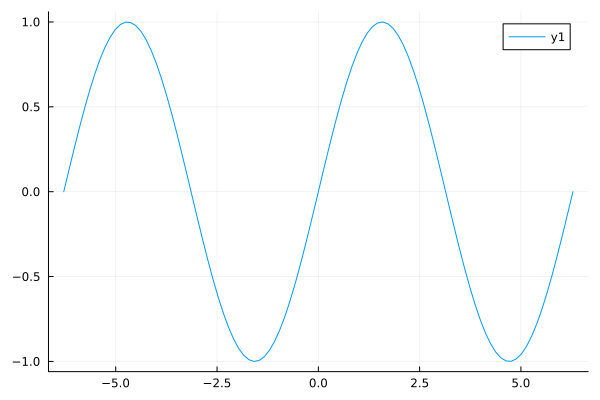

In [21]:
using Plots
puntos = range(-2π,2π,100)
y_miseno = @. seno(puntos)
y_seno = @. sin(puntos)
plot(puntos,y_miseno)
plot(puntos,y_seno)

# Ejemplo 2: Ecuación diferencial parabólica

$$\dfrac{d}{d x}\left(a(x)\dfrac{d h(x)}{d x}\right)-q(x)=0$$

Podemos usar una definición conveniente de la derivada numérica:

$$f'(x)\approx \dfrac{f(x+\frac{\Delta x}{2})-f(x-\frac{\Delta x}{2})}{2\cdot\dfrac{\Delta x}{2}} = \dfrac{f(x+\Delta x/2)-f(x-\Delta x/2)}{\Delta x},$$

para una malla donde se conoce un punto anterior y el punto siguiente. A esta también se le conoce como derivada numérica centrada.

En nuestra ecuación diferencial, se consigue que:

$$\dfrac{a\left(x+\frac{\Delta x}{2}\right)\dfrac{d}{dx}h\left(x+\frac{\Delta x}{2}\right)-a\left(x-\frac{\Delta x}{2}\right)\dfrac{d}{dx}h\left(x-\frac{\Delta x}{2}\right)}{\Delta x}-q(x)\approx 0$$

$$\dfrac{a\left(x+\frac{\Delta x}{2}\right)}{\Delta x^2}\left[h(x+\Delta x)-h(x)\right]-\dfrac{a\left(x-\frac{\Delta x}{2}\right)}{\Delta x^2}\left[h(x)-h(x-\Delta x)\right]-q(x)\approx 0$$

$$C_1\,h(x-\Delta x)+C_0\,h(x)+C_2\,h(x+\Delta x)-q(x)\approx 0$$

donde:

$$C_0=-(C_1+C_2)$$

$$C_1 = \dfrac{a(x-\Delta x)}{\Delta x^2}$$

$$C_2 = \dfrac{a(x+\Delta x)}{\Delta x^2}$$

Si reescribimos esta ecuación como iteraciones en diferencias finitas, se consigue que:

$$C_{1i}\;h_{i-1}+C_{0i}\;h_i+C_{2i}\;h_{i+1}-Q_i=0$$

para puntos en una malla dados por:

$$x_i\in \{x_{izq}\;,\;x_{1}\;,\;...\;,\;x_{n}\;,\;x_{der}\}$$

y condiciones a la frontera dados por:

$$h(x_{izq})=h_{izq}\quad;\quad h(x_{der})=h_{der}.$$

La notación aquí indica que $h(x_i)=h_i$ y $q(x_i)=Q_i$.

$$\left(\begin{matrix} C0_{1} & C2_{1} & 0 & 0 & 0 \\ 
C1_{2} & C0_{2} & C2_{2} & 0 & 0 \\
0 & C1_{3} & C0_{3} & C2_{3} & 0 \\
0 & 0 & C1_{4} & C0_{4} & C2_{4} \\
0 & 0 & 0 & C1_{5} & C0_{5}\end{matrix}\right)\left(\begin{matrix}h_1 \\ h_2 \\ h_3 \\ h_4 \\ h_5 \end{matrix}\right)=
\left(\begin{matrix}Q_1 \\ Q_2 \\ Q_3 \\ Q_4 \\ Q_5 \end{matrix}\right)-\left(\begin{matrix}C1_1\;h_{izq} \\ 0 \\ 0 \\ 0 \\ C2_5\;h_{der} \end{matrix}\right) $$

In [39]:
n = 5
x_izq = 0.0
x_der = 15.0
h_izq = 0.0
h_der = 500.0
a_izq = 2.5
a_der = 60.0
h = (x_der-x_izq)/n
C = zeros(n+2,n+2)
x = zeros(n+2)
a = [2.5, 13, 24.6, 31.2, 47.1, 54, 70]
h_frontera = [h_izq, h_der]

function sistemaElipticoEDO(C)
    x[1] = x_izq
    x[n+1] = x_der
    for i=2:n+1
        x[i] = x[i-1] + h
        C[2,i] = a[i-1]/(h*h)
        C[3,i] = a[i+1]/(h*h)
        C[1,i] = -C[2,i]-C[3,i]
    end
    return C
end

sistemaElipticoEDO (generic function with 2 methods)

In [40]:
sistemaElipticoEDO(C)

7×7 Matrix{Float64}:
 0.0  -3.01111   -4.91111  -7.96667  -9.46667  -13.0111   0.0
 0.0   0.277778   1.44444   2.73333   3.46667    5.23333  0.0
 0.0   2.73333    3.46667   5.23333   6.0        7.77778  0.0
 0.0   0.0        0.0       0.0       0.0        0.0      0.0
 0.0   0.0        0.0       0.0       0.0        0.0      0.0
 0.0   0.0        0.0       0.0       0.0        0.0      0.0
 0.0   0.0        0.0       0.0       0.0        0.0      0.0